In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
pressures = [[40, 4], [41, 4.1], [62, 6.2], [68, 6.8], [80, 8.0], [124, 12.4]]
temps = [[2290, 320], [2180, 160], [2200, 200], [2050, 150], [2280, 210], [2460, 380]]
k_samps = [[5, -1.4, 1.9], [6.1, -2.3, 2.9], [4.6, -1.8, 3], [4.3, -1.4, 2.3], [3.9, -1.1, 1.4], [5.9, -2.3, 4]]
g_df = pd.DataFrame(columns=['p', 'sig p', 't', 'sig t', 'k', '-sig k', '+sig k'])
g_df['p'] = [x[0] for x in pressures]
g_df['sig p'] = [x[1] for x in pressures]
g_df['t'] = [x[0] for x in temps]
g_df['sig t'] = [x[1] for x in temps]
g_df['k'] = [x[0] for x in k_samps]
g_df['-sig k'] = [x[1] for x in k_samps]
g_df['+sig k'] = [x[2] for x in k_samps]

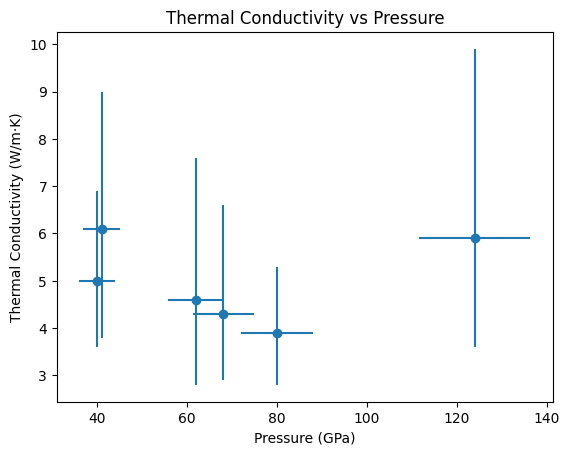

In [9]:
x = g_df['p']
xerr = g_df['sig p']

y = g_df['k']
yerr = [np.abs(g_df['-sig k']), g_df['+sig k']]

fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', capsize=0, label='Data points')
ax.set_xlabel('Pressure (GPa)')
ax.set_ylabel('Thermal Conductivity (W/m·K)')
ax.set_title('Thermal Conductivity vs Pressure')
plt.show()

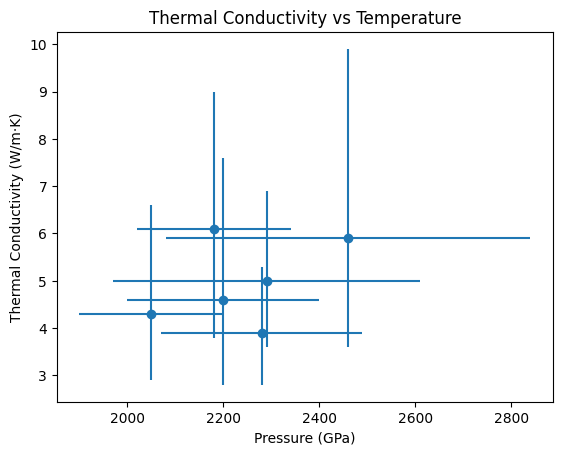

In [10]:
x = g_df['t']
xerr = g_df['sig t']

y = g_df['k']
yerr = [np.abs(g_df['-sig k']), g_df['+sig k']]

fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', capsize=0, label='Data points')
ax.set_xlabel('Pressure (GPa)')
ax.set_ylabel('Thermal Conductivity (W/m·K)')
ax.set_title('Thermal Conductivity vs Temperature')
plt.show()

In [11]:
import pandas as pd
from scipy.interpolate import griddata

df = pd.read_csv('data/theoretical/p_t.csv')

pts = df[['pressure_GPa', 'temp_K']].values
vals = df['depth_m'].values

def predict_depth(P, T):
    # Try linear interpolation first
    result = griddata(pts, vals, (P, T), method='linear')
    if np.isnan(result):
        # If linear fails, use nearest neighbor
        result = griddata(pts, vals, (P, T), method='nearest')
    return result

In [12]:
# 40 GPa data
import numpy as np
import pandas as pd

# 40 Gpa
run = np.load('outputs/geballe/40Gpa/run1_fwhm/mcmc_results.npz')
samples = run['samples_full'].reshape(-1, run['samples_full'].shape[2])
df_40_1 = pd.DataFrame({'k_sample' : samples[:, 8],
                      'k_ins' : samples[:, 9],
                      'k_coupler' : samples[:, 10],})

run = np.load('outputs/geballe/40Gpa/run2_fwhm/mcmc_results.npz')
samples = run['samples_full'].reshape(-1, run['samples_full'].shape[2])
df_40_2 = pd.DataFrame({'k_sample' : samples[:, 8],
                      'k_ins' : samples[:, 9],
                      'k_coupler' : samples[:, 10],})

run = np.load('outputs/geballe/40Gpa/run3_fwhm/mcmc_results.npz')
samples = run['samples_full'].reshape(-1, run['samples_full'].shape[2])
df_40_3 = pd.DataFrame({'k_sample' : samples[:, 8],
                      'k_ins' : samples[:, 9],
                      'k_coupler' : samples[:, 10],})

run = np.load('outputs/geballe/40Gpa/run4_fwhm/mcmc_results.npz')
samples = run['samples_full'].reshape(-1, run['samples_full'].shape[2])
df_40_4 = pd.DataFrame({'k_sample' : samples[:, 8],
                      'k_ins' : samples[:, 9],
                      'k_coupler' : samples[:, 10],})  

all_sample_40 = [df_40_1['k_sample'], df_40_2['k_sample'], df_40_3['k_sample'], df_40_4['k_sample']]
all_ins_40 = [df_40_1['k_ins'], df_40_2['k_ins'], df_40_3['k_ins'], df_40_4['k_ins']]
all_coupler_40 = [df_40_1['k_coupler'], df_40_2['k_coupler'], df_40_3['k_coupler'], df_40_4['k_coupler']]
temps_40 = [pd.read_csv(f'data/experimental/geballe/geballe_40Gpa_{i+1}.csv')['oside'].mean() for i in range(4)]

In [13]:
# 41 Gpa
run = np.load('outputs/geballe/41Gpa/run1_fwhm/mcmc_results.npz')
samples_full = run['samples_full']  

# Calculate variance across samples (axis=0) for each chain
chain_vars = np.var(samples_full, axis=0)  # Shape: (60, 11)
low_chain = np.argmin(chain_vars[:, 8])  # Find chain with lowest variance for k_sample
good_chains = np.arange(samples_full.shape[1]) != low_chain  # Use shape[1] for walkers

# Filter out the bad chain
filtered_samples = samples_full[:, good_chains, :]  # Remove the bad chain
filtered_samples = filtered_samples.reshape(-1, filtered_samples.shape[2])
df_41_1 = pd.DataFrame({'k_sample' : filtered_samples[:, 8],
                      'k_ins' : filtered_samples[:, 9],
                      'k_coupler' : filtered_samples[:, 10],})

run = np.load('outputs/geballe/41Gpa/run2_fwhm/mcmc_results.npz')

all_sample_41 = [df_41_1['k_sample']]
temps_41 = [pd.read_csv(f'data/experimental/geballe/geballe_41Gpa_{i+1}.csv')['oside'].mean() for i in range(1)]


In [ ]:
# 62 Gpa
run = np.load('outputs/geballe/62Gpa/run1/mcmc_results.npz')
samples_full = run['samples_full'].reshape(-1, run['samples_full'].shape[2])
df_62_1 = pd.DataFrame({'k_sample' : samples_full[:, 8],
                      'k_ins' : samples_full[:, 9],
                      'k_coupler' : samples_full[:, 10],})

run = np.load('outputs/geballe/62Gpa/run2/mcmc_results.npz')
samples_full = run['samples_full'].reshape(-1, run['samples_full'].shape[2])
df_62_2 = pd.DataFrame({'k_sample' : samples_full[:, 8],
                      'k_ins' : samples_full[:, 9],
                      'k_coupler' : samples_full[:, 10],})  

all_sample_62 = [df_62_1['k_sample'], df_62_2['k_sample']]
temps_62 = [pd.read_csv(f'data/experimental/geballe/geballe_62GPa_{i+1}.csv')['oside'].mean() for i in range(2)]

In [20]:
# 68 Gpa
run = np.load('outputs/geballe/68Gpa/run1/mcmc_results.npz')
samples_full = run['samples_full'].reshape(-1, run['samples_full'].shape[2])
df_68_1 = pd.DataFrame({'k_sample' : samples_full[:, 8],
                      'k_ins' : samples_full[:, 9],
                      'k_coupler' : samples_full[:, 10],})

run = np.load('outputs/geballe/68Gpa/run2_fwhm/mcmc_results.npz')
samples_full = run['samples_full'].reshape(-1, run['samples_full'].shape[2])
df_68_2 = pd.DataFrame({'k_sample' : samples_full[:, 8],
                      'k_ins' : samples_full[:, 9],
                      'k_coupler' : samples_full[:, 10],})  

all_sample_68 = [df_68_1['k_sample'], df_68_2['k_sample']]
temps_68 = [pd.read_csv(f'data/experimental/geballe/geballe_68GPa_{i+1}.csv')['oside'].mean() for i in range(2)]

In [18]:
# 80 Gpa -------------------------------------------------------------------------
run = np.load('outputs/geballe/80Gpa/run1/mcmc_results.npz')
samples_full = run['samples_full'].reshape(-1, run['samples_full'].shape[2])
df_80_1 = pd.DataFrame({'k_sample' : samples_full[:, 8],
                      'k_ins' : samples_full[:, 9],
                      'k_coupler' : samples_full[:, 10],})

run = np.load('outputs/geballe/80Gpa/run2/mcmc_results.npz')
samples_full = run['samples_full'].reshape(-1, run['samples_full'].shape[2])
df_80_2 = pd.DataFrame({'k_sample' : samples_full[:, 8],
                      'k_ins' : samples_full[:, 9],
                      'k_coupler' : samples_full[:, 10],})

run = np.load('outputs/geballe/80Gpa/run3/mcmc_results.npz')
samples_full = run['samples_full'].reshape(-1, run['samples_full'].shape[2])
df_80_3 = pd.DataFrame({'k_sample' : samples_full[:, 8],
                      'k_ins' : samples_full[:, 9],
                      'k_coupler' : samples_full[:, 10],})

all_sample_80 = [df_80_1['k_sample'], df_80_2['k_sample'], df_80_3['k_sample']]
temps_80 = [pd.read_csv(f'data/experimental/geballe/geballe_80GPa_{i+1}.csv')['oside'].mean() for i in range(3)]

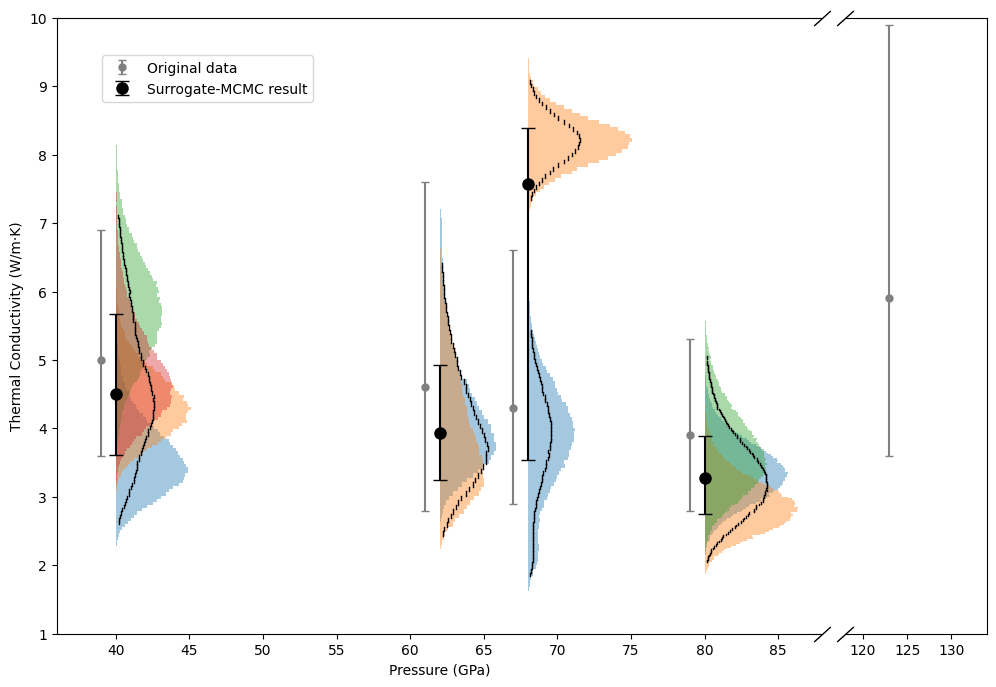

In [24]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.ticker as ticker

pressures = [40, 41, 62, 68, 80, 124]

# Create figure with GridSpec to control subplot widths
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[5.4, 1])  # 3:1 ratio for left:right panels
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)

fig.subplots_adjust(wspace=0.05)  # adjust space between Axes

dx_scale = 6.0
ax1.set_xlim(36, 88)
ax2.set_xlim(118, 134)
ax1.set_ylim(1, 10)
ax2.set_ylim(1, 10)
ax1.set_xlabel('Pressure (GPa)')
ax1.set_ylabel('Thermal Conductivity (W/m·K)')   

# Set major ticks every 5 units
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))

# Plot original data on both axes
ax1.errorbar(g_df['p'].drop(1)-1, g_df['k'].drop(1), yerr=[np.abs(g_df['-sig k'].drop(1)), np.abs(g_df['+sig k'].drop(1))], 
            fmt='o', color='gray', markersize=5, capsize=3, label='Original data')
ax2.errorbar(g_df['p'].drop(1)-1, g_df['k'].drop(1), yerr=[np.abs(g_df['-sig k'].drop(1)), np.abs(g_df['+sig k'].drop(1))], 
            fmt='o', color='gray', markersize=5, capsize=3, label='Original data')

# 40 GPa -------------------------------------------------------------------------
bin_edges = np.linspace(min([arr.min() for arr in all_sample_40]),
                       max([arr.max() for arr in all_sample_40]), 201)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]
dens_40 = [np.histogram(arr, bins=bin_edges, density=True)[0] for arr in all_sample_40]

for dens in dens_40:
    ax1.barh(
        bin_centers,
        dens * dx_scale,
        height=bin_width,
        left=pressures[0],
        alpha=0.4,
        edgecolor='none'
    )
combined = np.histogram(np.concatenate(all_sample_40), bins=bin_edges, density=True)
bar_centers = bin_centers  
bar_heights = combined[0] * dx_scale  

for i in range(len(bar_centers)):
    if bar_heights[i] > 0.15:
        bar_top = bar_centers[i] + bin_width/2
        bar_bottom = bar_centers[i] - bin_width/2
        
        ax1.plot([pressures[0] + bar_heights[i], pressures[0] + bar_heights[i]], 
                [bar_bottom, bar_top], color='black', linewidth=1)
all_sample_concat = np.concatenate(all_sample_40)
lower = np.percentile(all_sample_concat, 16)
upper = np.percentile(all_sample_concat, 84)
median = np.percentile(all_sample_concat, 50)
ax1.errorbar(pressures[0], median, yerr=[[median - lower], [upper - median]], fmt='o', 
color='black', markersize=8, capsize=5, label='Surrogate-MCMC result')
# --------------------------------------------------------------------------------

# 41 GPa -------------------------------------------------------------------------

# --------------------------------------------------------------------------------

# 62 GPa -------------------------------------------------------------------------
ax1.set_prop_cycle(None)
bin_edges = np.linspace(min([arr.min() for arr in all_sample_62]),
                       max([arr.max() for arr in all_sample_62]), 201)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]
dens_62 = [np.histogram(arr, bins=bin_edges, density=True)[0] for arr in all_sample_62] 

for dens in dens_62:
    ax1.barh(
        bin_centers,
        dens * dx_scale,
        height=bin_width,
        left=pressures[2],
        alpha=0.4,
        edgecolor='none'
    )
combined = np.histogram(np.concatenate(all_sample_62), bins=bin_edges, density=True)
bar_centers = bin_centers  
bar_heights = combined[0] * dx_scale  

for i in range(len(bar_centers)):
    if bar_heights[i] > 0.15:
        bar_top = bar_centers[i] + bin_width/2
        bar_bottom = bar_centers[i] - bin_width/2
        
        ax1.plot([pressures[2] + bar_heights[i], pressures[2] + bar_heights[i]], 
                [bar_bottom, bar_top], color='black', linewidth=1)
all_sample_concat = np.concatenate(all_sample_62)
lower = np.percentile(all_sample_concat, 16)
upper = np.percentile(all_sample_concat, 84)
median = np.percentile(all_sample_concat, 50)
ax1.errorbar(pressures[2], median, yerr=[[median - lower], [upper - median]], fmt='o', 
color='black', markersize=8, capsize=5)
# --------------------------------------------------------------------------------

# 68 GPa -------------------------------------------------------------------------
ax1.set_prop_cycle(None)
bin_edges = np.linspace(min([arr.min() for arr in all_sample_68]),
                       max([arr.max() for arr in all_sample_68]), 201)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]
dens_68 = [np.histogram(arr, bins=bin_edges, density=True)[0] for arr in all_sample_68] 

for dens in dens_68:
    ax1.barh(
        bin_centers,
        dens * dx_scale,
        height=bin_width,
        left=pressures[3],
        alpha=0.4,
        edgecolor='none'
    )
combined = np.histogram(np.concatenate(all_sample_68), bins=bin_edges, density=True)
bar_centers = bin_centers  
bar_heights = combined[0] * dx_scale  

for i in range(len(bar_centers)):
    if bar_heights[i] > 0.15:
        bar_top = bar_centers[i] + bin_width/2
        bar_bottom = bar_centers[i] - bin_width/2
        
        ax1.plot([pressures[3] + bar_heights[i], pressures[3] + bar_heights[i]], 
                [bar_bottom, bar_top], color='black', linewidth=1)
all_sample_concat = np.concatenate(all_sample_68)
lower = np.percentile(all_sample_concat, 16)
upper = np.percentile(all_sample_concat, 84)
median = np.percentile(all_sample_concat, 50)
ax1.errorbar(pressures[3], median, yerr=[[median - lower], [upper - median]], fmt='o', 
color='black', markersize=8, capsize=5)
# --------------------------------------------------------------------------------

# 80 GPa -------------------------------------------------------------------------
ax1.set_prop_cycle(None)
bin_edges = np.linspace(min([arr.min() for arr in all_sample_80]),
                       max([arr.max() for arr in all_sample_80]), 201)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]
dens_80 = [np.histogram(arr, bins=bin_edges, density=True)[0] for arr in all_sample_80] 

for dens in dens_80:
    ax1.barh(
        bin_centers,
        dens * dx_scale,
        height=bin_width,
        left=pressures[4],
        alpha=0.4,
        edgecolor='none'
    )
combined = np.histogram(np.concatenate(all_sample_80), bins=bin_edges, density=True)
bar_centers = bin_centers  
bar_heights = combined[0] * dx_scale  

for i in range(len(bar_centers)):
    if bar_heights[i] > 0.15:
        bar_top = bar_centers[i] + bin_width/2
        bar_bottom = bar_centers[i] - bin_width/2
        
        ax1.plot([pressures[4] + bar_heights[i], pressures[4] + bar_heights[i]], 
                [bar_bottom, bar_top], color='black', linewidth=1)
all_sample_concat = np.concatenate(all_sample_80)
lower = np.percentile(all_sample_concat, 16)
upper = np.percentile(all_sample_concat, 84)
median = np.percentile(all_sample_concat, 50)
ax1.errorbar(pressures[4], median, yerr=[[median - lower], [upper - median]], fmt='o', 
color='black', markersize=8, capsize=5)
# --------------------------------------------------------------------------------

# Hide the spines between ax1 and ax2
ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.yaxis.set_visible(False)  # Hide the entire y-axis on the right panel
ax1.yaxis.tick_left()

# Add the slanted lines to indicate the break
d = .9  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)
ax1.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))


plt.show()

In [174]:
temps_40

[np.float64(2011.4715087510258),
 np.float64(2032.3849034034242),
 np.float64(2019.3983724386896),
 np.float64(2056.863942399764)]

In [112]:
print([x for x in zip(temps_40, [pressures[0]]*len(temps_40))])

[(1990, 40), (2007, 40), (1982, 40), (2029, 40)]


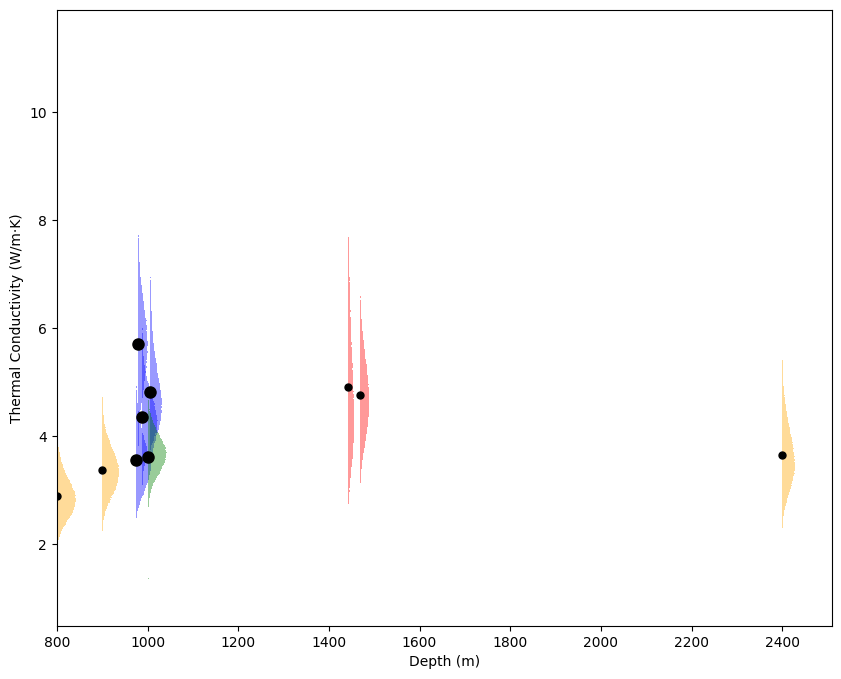

In [172]:
fig, ax = plt.subplots(figsize=(10, 8))
dx_scale = 40.0
ax.set_xlabel('Depth (m)')
ax.set_ylabel('Thermal Conductivity (W/m·K)')   


# 40 GPa -------------------------------------------------------------------------
bin_edges = np.linspace(min([arr.min() for arr in all_sample_40]),
                       max([arr.max() for arr in all_sample_40]), 300)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]
dens_40 = [np.histogram(arr, bins=bin_edges, density=True)[0] for arr in all_sample_40]
depths_40 = [predict_depth(pressure, temp) for temp, pressure in zip(temps_40, [pressures[0]]*len(temps_40))]

count = 0
for dens, depth in zip(dens_40, depths_40):
    ax.barh(
        bin_centers,
        dens * dx_scale,
        height=bin_width,
        left=depth,
        alpha=0.4,
        edgecolor='none',
        color='blue'
    )
    ax.plot(depth, np.mean(all_sample_40[count]), 'o', color='black', markersize=8)
    count += 1
# --------------------------------------------------------------------------------

# 41 Gpa -------------------------------------------------------------------------
bin_edges = np.linspace(min([arr.min() for arr in all_sample_41]),
                       max([arr.max() for arr in all_sample_41]), 300)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]
dens_41 = [np.histogram(arr, bins=bin_edges, density=True)[0] for arr in all_sample_41]
depths_41 = [predict_depth(pressure, temp) for temp, pressure in zip(temps_41, [pressures[1]]*len(temps_41))]


count = 0
for dens, depth in zip(dens_41, depths_41):
    ax.barh(
        bin_centers,
        dens * dx_scale,
        height=bin_width,
        left=depth,
        alpha=0.4,
        edgecolor='none',
        color='green'
    )
    ax.plot(depth, np.mean(all_sample_41[count]), 'o', color='black', markersize=8)
    count += 1
# --------------------------------------------------------------------------------

# 62 Gpa -------------------------------------------------------------------------
bin_edges = np.linspace(min([arr.min() for arr in all_sample_62]),
                       max([arr.max() for arr in all_sample_62]), 300)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]
dens_62 = [np.histogram(arr, bins=bin_edges, density=True)[0] for arr in all_sample_62]
depths_62 = [predict_depth(pressure, temp) for temp, pressure in zip(temps_62, [pressures[2]]*len(temps_62))]


count = 0
for dens, depth in zip(dens_62, depths_62):
    ax.barh(
        bin_centers,
        dens * dx_scale,
        height=bin_width,
        left=depth,
        alpha=0.4,
        edgecolor='none',
        color='red'
    )
    ax.plot(depth, np.mean(all_sample_62[count]), 'o', color='black', markersize=5)
    count += 1
# --------------------------------------------------------------------------------

# 80 Gpa -------------------------------------------------------------------------
bin_edges = np.linspace(min([arr.min() for arr in all_sample_80]),
                       max([arr.max() for arr in all_sample_80]), 300)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]
dens_80 = [np.histogram(arr, bins=bin_edges, density=True)[0] for arr in all_sample_80]
depths_80 = [predict_depth(pressure, temp) for temp, pressure in zip(temps_80, [pressures[4]]*len(temps_80))]


count = 0
for dens, depth in zip(dens_80, depths_80):
    ax.barh(
        bin_centers,
        dens * dx_scale,
        height=bin_width,
        left=depth,
        alpha=0.4,
        edgecolor='none',
        color='orange'
    )
    ax.plot(depth, np.mean(all_sample_80[count]), 'o', color='black', markersize=5)
    count += 1

In [173]:
temps_80

[np.float64(2065.806170813692),
 np.float64(2024.2285398523704),
 np.float64(2507.87975145098)]

In [142]:
# Debug the predict_depth function for 80 GPa
print("Testing predict_depth function:")
for i, (temp, pressure) in enumerate(zip(temps_80, [pressures[4]]*len(temps_80))):
    print(f"Input: temp={temp}, pressure={pressure}")
    result = predict_depth(pressure, temp)
    print(f"Output: {result}")
    print(f"Type: {type(result)}")
    print("---")

# Also test with the working 40 GPa data to compare
print("Testing with 40 GPa data for comparison:")
for i, (temp, pressure) in enumerate(zip(temps_40, [pressures[0]]*len(temps_40))):
    print(f"Input: temp={temp}, pressure={pressure}")
    result = predict_depth(pressure, temp)
    print(f"Output: {result}")
    print("---")

Testing predict_depth function:
Input: temp=2048, pressure=80
Output: nan
Type: <class 'numpy.ndarray'>
---
Input: temp=1998, pressure=80
Output: nan
Type: <class 'numpy.ndarray'>
---
Input: temp=2455, pressure=80
Output: nan
Type: <class 'numpy.ndarray'>
---
Testing with 40 GPa data for comparison:
Input: temp=1990, pressure=40
Output: 958.1673932576794
---
Input: temp=2007, pressure=40
Output: 970.2674964225099
---
Input: temp=1982, pressure=40
Output: 952.4732270624659
---
Input: temp=2029, pressure=40
Output: 985.9264534593492
---


In [117]:
# Add some debugging to see what's happening
print("Temps 40:", temps_40)
print("Pressures 40:", [pressures[0]]*len(temps_40))

# Test the predict_depth function with some sample values
test_temp = temps_40[0] if temps_40 else 2000
test_pressure = pressures[0]
print(f"Testing predict_depth with temp={test_temp}, pressure={test_pressure}")
print(f"Result: {predict_depth(test_temp, test_pressure)}")

# Check if the function exists and what it expects
import inspect
if 'predict_depth' in globals():
    print("predict_depth function signature:")
    print(inspect.signature(predict_depth))
else:
    print("predict_depth function not found")

Temps 40: [1990, 2007, 1982, 2029]
Pressures 40: [40, 40, 40, 40]
Testing predict_depth with temp=1990, pressure=40
Result: nan
predict_depth function signature:
(P, T)


In [8]:
import numpy as np

arr = all_sample_40[1]   # pick one of your runs
dens, edges = np.histogram(arr, bins=300, density=True)
centers = 0.5*(edges[:-1] + edges[1:])
mode   = centers[np.argmax(dens)]
median = np.median(arr)
mean   = arr.mean()
print(f"mode = {mode:.2f}, median = {median:.2f}, mean = {mean:.2f}")

mode = 4.30, median = 4.33, mean = 4.36


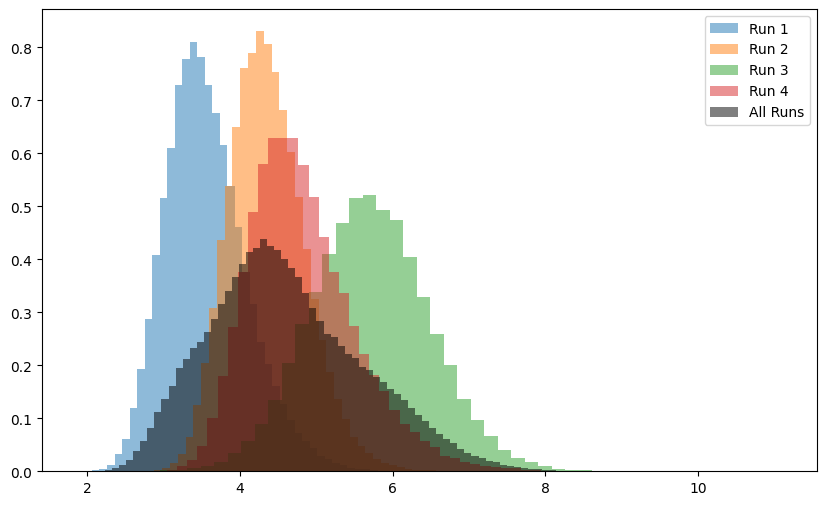

In [9]:
bin_edges = np.linspace(
    min(arr.min() for arr in all_sample_40),
    max(arr.max() for arr in all_sample_40),
    200
)
ks = np.concat([arr.values for arr in all_sample_40])

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_40_1['k_sample'], bins=50, alpha=0.5, label='Run 1', density=True)
ax.hist(df_40_2['k_sample'], bins=50, alpha=0.5, label='Run 2', density=True)
ax.hist(df_40_3['k_sample'], bins=50, alpha=0.5, label='Run 3', density=True)
ax.hist(df_40_4['k_sample'], bins=50, alpha=0.5, label='Run 4', density=True)
ax.hist(ks, bins=100, density=True, alpha=0.5, label='All Runs', color='black')
ax.legend()

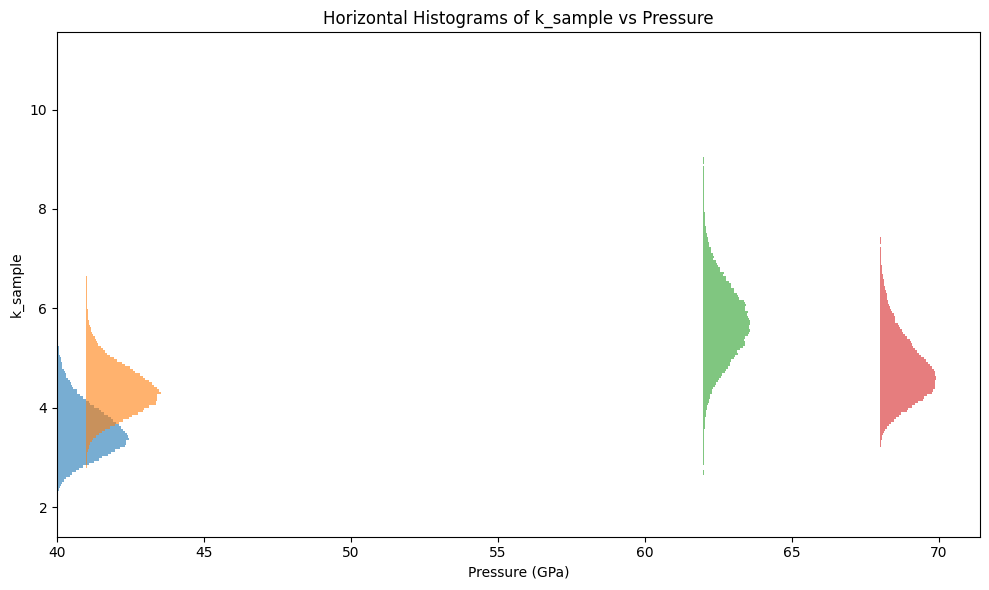

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Collect your four runs (assumes df_40_1, df_40_2, df_40_3, df_40_4 already defined) ---
arrays = [
    df_40_1['k_sample'].values,
    df_40_2['k_sample'].values,
    df_40_3['k_sample'].values,
    df_40_4['k_sample'].values,
]
pressures = [40, 41, 62, 68]  # GPa values matching each run

# --- 2. Define a common grid of bins across all runs ---
bin_edges = np.linspace(
    min(arr.min() for arr in arrays),
    max(arr.max() for arr in arrays),
    200  # adjust for smoothness
)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]

# --- 3. Compute density histograms for each run ---
densities = [
    np.histogram(arr, bins=bin_edges, density=True)[0]
    for arr in arrays
]

# --- Option C: Horizontal histograms positioned at each pressure ---
# Scale factor for histogram width on the x-axis
dx_scale = 3.0  # tweak to make bars visible relative to pressure spacing

plt.figure(figsize=(10, 6))
for density, p in zip(densities, pressures):
    # barh: y=bin_centers, width=density*dx_scale, left=p, height=bin_width
    plt.barh(
        bin_centers,
        density * dx_scale,
        height=bin_width,
        left=p,
        alpha=0.6,
    )

plt.xlabel('Pressure (GPa)')
plt.ylabel('k_sample')
plt.title('Horizontal Histograms of k_sample vs Pressure')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '40 gpa k_ins')

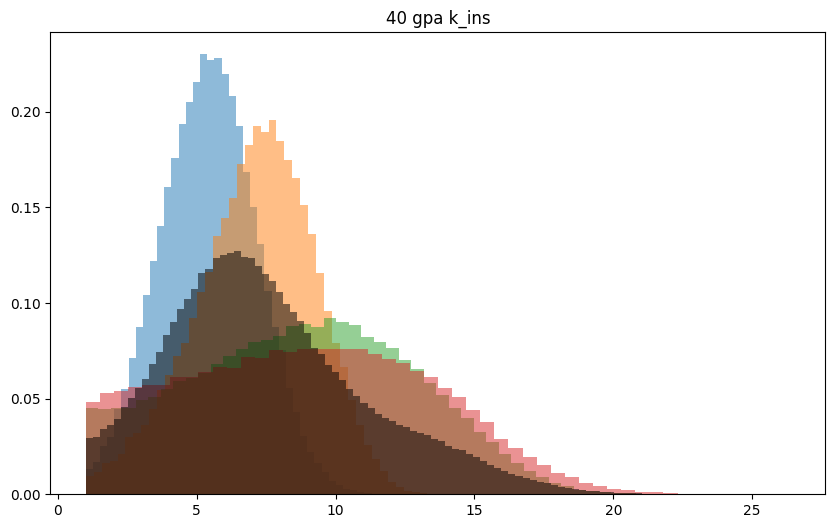

In [11]:
inss =  np.concat([arr.values for arr in all_ins_40])

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_40_1['k_ins'], bins=50, alpha=0.5, label='Run 1', density=True)
ax.hist(df_40_2['k_ins'], bins=50, alpha=0.5, label='Run 2', density=True)
ax.hist(df_40_3['k_ins'], bins=50, alpha=0.5, label='Run 3', density=True)
ax.hist(df_40_4['k_ins'], bins=50, alpha=0.5, label='Run 4', density=True)
ax.hist(inss, bins=100, density=True, alpha=0.5, label='All Runs', color='black')

ax.set_title('40 gpa k_ins')

Text(0.5, 1.0, '40 gpa k_ins')

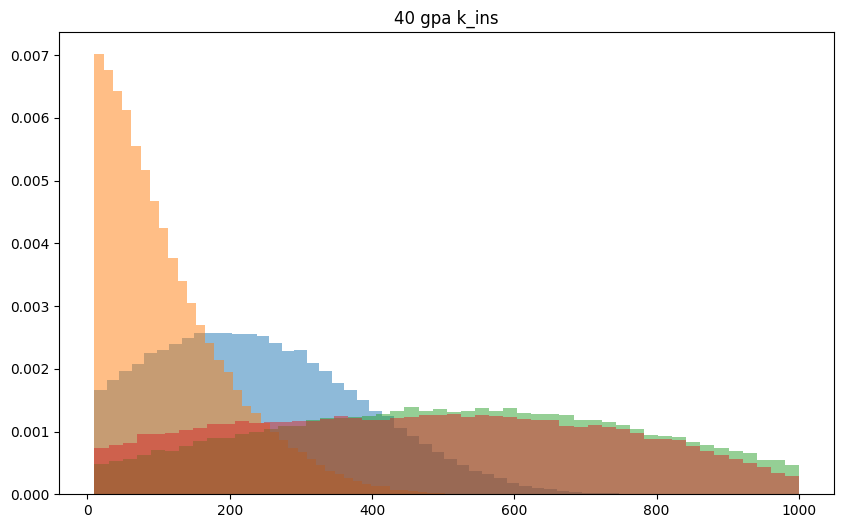

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_40_1['k_coupler'], bins=50, alpha=0.5, label='Run 1', density=True)
ax.hist(df_40_2['k_coupler'], bins=50, alpha=0.5, label='Run 2', density=True)
ax.hist(df_40_3['k_coupler'], bins=50, alpha=0.5, label='Run 3', density=True)
ax.hist(df_40_4['k_coupler'], bins=50, alpha=0.5, label='Run 4', density=True)

ax.set_title('40 gpa k_ins')